In [3]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


In [4]:
# 디렉토리로 이동
os.chdir(r'C:\Users\zero_\AIFFEL_quest_rs\Exploration\EX_2\cat_sticker')

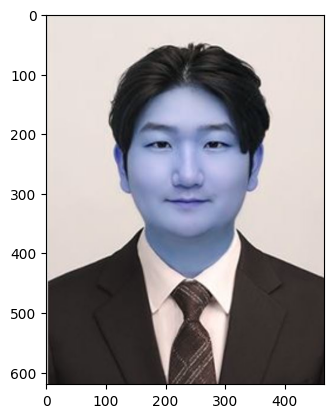

In [5]:
my_image_path = r'images\image.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)


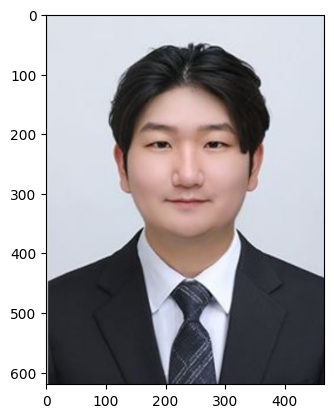

In [6]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [7]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [8]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(139, 180) (324, 366)]]


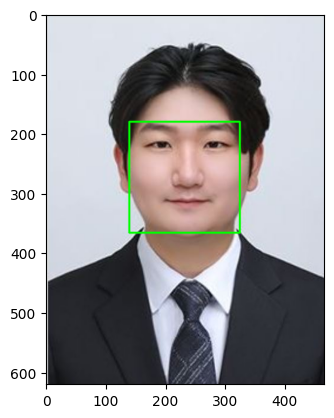

In [9]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
import bz2

input_path = 'model/shape_predictor_68_face_landmarks.dat.bz2'
output_path = 'model/shape_predictor_68_face_landmarks.dat'

with bz2.BZ2File(input_path, 'rb') as fr, open(output_path, 'wb') as fw:
    fw.write(fr.read())

print("✅ 압축 해제 완료!")

✅ 압축 해제 완료!


In [11]:
import os
print(os.getcwd())
os.chdir(r'C:\Users\zero_\AIFFEL_quest_rs\Exploration\EX_2\cat_sticker')


C:\Users\zero_\AIFFEL_quest_rs\Exploration\EX_2\cat_sticker


In [12]:

import dlib

# 모델 경로 설정 (절대 경로 or 현재 디렉토리 기준 상대 경로 사용 가능)
model_path = r'model/shape_predictor_68_face_landmarks.dat'  # 현재 디렉토리에서 model 폴더 안

# 랜드마크 예측기 로드
landmark_predictor = dlib.shape_predictor(model_path)

print("🌫🛸 모델 불러오기 성공!")


🌫🛸 모델 불러오기 성공!


In [13]:
list_landmarks = []  # 랜드마크 좌표 저장용 리스트

# 얼굴 영역 리스트(dlib_rects)에서 각각 처리
for dlib_rect in dlib_rects:
    # 랜드마크 예측
    points = landmark_predictor(img_rgb, dlib_rect)

    # 각 포인트를 (x, y) 튜플로 변환
    list_points = [(p.x, p.y) for p in points.parts()]

    # 전체 랜드마크 리스트에 추가
    list_landmarks.append(list_points)

# 첫 번째 얼굴의 랜드마크 개수 출력
print(len(list_landmarks[0]))


68


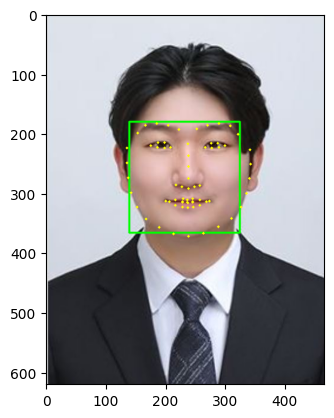

In [14]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    # 변수들에 대한 설명
    # x : 코 부위의 x좌표
    # y : 코 부위의 y좌표 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2
    # w : 얼굴 영역의 가로를 차지하는 픽셀의 수
    # h : 얼굴 영역의 세로를 차지하는 픽셀의 수
    # dlib_rect.width() : 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    # dlib_rect.height() : 얼굴 영역의 세로를 차지하는 픽셀의 수 (437-182+1) → max(y) - min(y) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    # dlib_rect.left() : 얼굴 영역의 왼쪽 좌표 (345)
    # dlib_rect.right() : 얼굴 영역의 오른쪽 좌표 (531)
    # dlib_rect.top() : 얼굴 영역의 위쪽 좌표 (182)
    # dlib_rect.bottom() : 얼굴 영역의 아래쪽 좌표 (437)
    # dlib_rect : 얼굴 영역을 감지한 값
    # landmark : 랜드마크를 감지한 값

(238, 275)
(x,y) : (238,182)
(w,h) : (186,186)


In [16]:
sticker_path = r'images\cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
print(img_sticker.shape)  # 반드시 (H, W, 4)여야 함
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(512, 512, 3)
(186, 186, 3)


In [17]:

# 언제나 코의 위치를 기준으로 하여 스티커를 붙이기 위해서 코의 위치를 기준으로 스티커의 위치를 조정합니다.
refined_x = int( x - w//2 ) # 코의 x좌표 - 스티커의 가로 길이//2 → (437-187//2) = 348
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})') 


(x,y) : (145,182)


In [18]:

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (145,182)


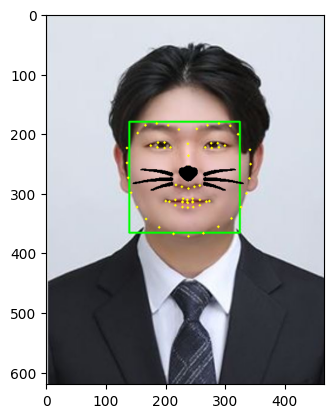

In [19]:
# 스티커를 붙일 영역을 지정합니다.

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] : 스티커를 붙일 영역을 지정합니다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8) # np.where(조건문, 참일 때, 거짓일 때) : 조건문이 참이면 참일 때의 값을, 거짓이면 거짓일 때의 값을 반환합니다.
# img_sticker==0 : 스티커 이미지의 픽셀 값이 0인 부분을 찾습니다.
# img_sticker : 스티커 이미지의 픽셀 값이 0인 부분을 찾습니다.
# sticker_area : 스티커를 붙일 영역을 지정합니다.
# np.where(조건문, 참일 때, 거짓일 때) : 조건문이 참이면 참일 때의 값을, 거짓이면 거짓일 때의 값을 반환합니다.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

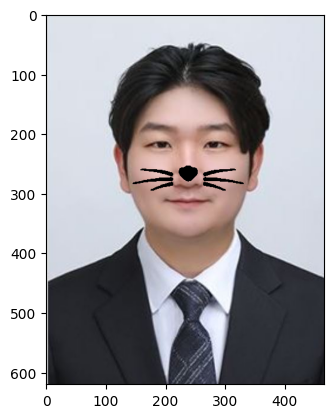

In [20]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

여기서 부턴 마스크도 끼고 기울어진 이미지를 해결하는 방법

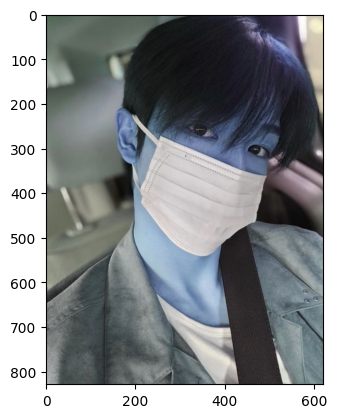

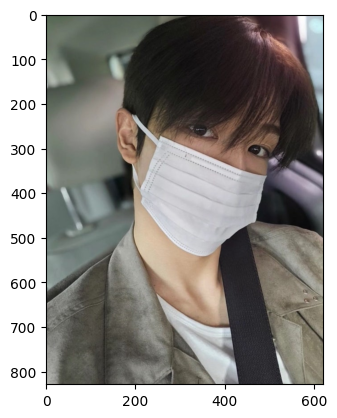

In [21]:
# 새로운 이미지 경로
my_image_path = 'images/tiltmask.png'  # 프로젝트 구조에 맞춘 상대 경로
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지 복사본
plt.imshow(img_bgr)
plt.show()

# RGB 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


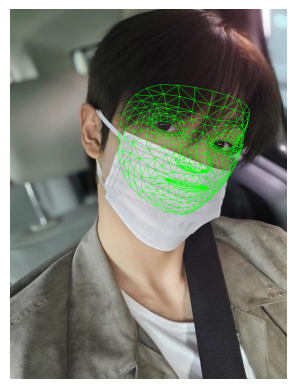

In [22]:
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Mediapipe face mesh 로드
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5) as face_mesh:
    results = face_mesh.process(img_rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=img_show,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1),
            )

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [23]:
# 얼굴 랜드마크 좌표 가져오기
landmark_coords = []
for lm in face_landmarks.landmark:
    x = int(lm.x * img_rgb.shape[1])
    y = int(lm.y * img_rgb.shape[0])
    landmark_coords.append((x, y))

# 눈 좌표 (왼쪽: 33~133, 오른쪽: 362~263 참고)
left_eye = landmark_coords[33]
right_eye = landmark_coords[263]

# 기울기 계산
dx = right_eye[0] - left_eye[0]
dy = right_eye[1] - left_eye[1]
angle = np.degrees(np.arctan2(dy, dx))
print(f"얼굴 기울기 각도: {angle:.2f}°")


얼굴 기울기 각도: 15.44°


In [25]:
# 코 위치 (tip of nose: 1번 포인트)
nose = landmark_coords[1]

# 이미지 불러오기
sticker_path = 'images/cat-whiskers.png'
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # alpha 포함
sticker_img = cv2.resize(sticker_img, (150, 100))  # 크기 조정

In [ ]:
# 이전에 계산한 기울기로 스티커도 회전 시키기
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, rot_mat, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))
    return rotated

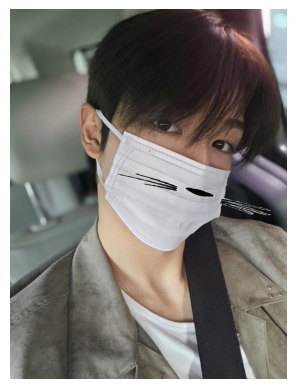

In [35]:
# 🔁 이미지 초기화
img_show = img_bgr.copy()

# 2️⃣ 얼굴 기준 목표 폭 설정
face_width = int(np.linalg.norm(np.array(right_eye) - np.array(left_eye)))
target_width = face_width * 2  # 얼굴보다 살짝 넓게

# 3️⃣ 비율 유지한 높이 계산
target_height = int(target_width * aspect_ratio)

# 4️⃣ 비율 유지한 리사이즈 적용
sticker_resized = cv2.resize(sticker_img, (target_width, target_height), interpolation=cv2.INTER_AREA)


# 3️⃣ 회전 각도 적용 (좌우 기준 맞추기)
sticker_rotated = rotate_image(sticker_resized, -angle)

# 4️⃣ 부착 위치: 코 아래쪽 기준으로 가운데 정렬
x = nose[0] - sticker_rotated.shape[1] // 2
y = nose[1] + 10  # 코 아래로 살짝 내림

# 5️⃣ 알파 채널 기반 스티커 부착
for c in range(3):  # R, G, B
    try:
        img_show[y:y+sticker_rotated.shape[0], x:x+sticker_rotated.shape[1], c] = np.where(
            sticker_rotated[:, :, 3] > 0,
            sticker_rotated[:, :, c],
            img_show[y:y+sticker_rotated.shape[0], x:x+sticker_rotated.shape[1], c]
        )
    except:
        print("⚠️ 스티커 부착 범위가 이미지 밖으로 나갔어요. 위치(x,y) 조정이 필요할 수 있어요.")

# 6️⃣ 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("")
plt.show()